In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns=['math_score'],axis=1)

In [7]:
y=df['math_score']

In [9]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
cat_transformer= OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer, cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# X_train.shape, X_test.shape
y_train.shape, y_test.shape

((800,), (200,))

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))

    print('---------------------')

    print('Model performance for test set')
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model performance for training set
Root Mean Squared Error: 5.3255
Mean Absolute Error: 4.2685
R2 score: 0.8742
---------------------
Model performance for test set
Root Mean Squared Error: 5.4009
Mean Absolute Error: 4.2184
R2 score: 0.8801


Lasso
Model performance for training set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 score: 0.8071
---------------------
Model performance for test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 score: 0.8253


Ridge
Model performance for training set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 score: 0.8743
---------------------
Model performance for test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 score: 0.8806


K-Neighbors Regressor
Model performance for training set
Root Mean Squared Error: 5.7093
Mean Absolute Error: 4.5175
R2 score: 0.8554
---------------------
Model performance for test set
Root Mean Squared Error: 7.2583
Mean Absolute Error:

#### Results

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880127
8,AdaBoost Regressor,0.855129
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.850853
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.742909


### Linear Regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 88.01


Text(0, 0.5, 'predicted')

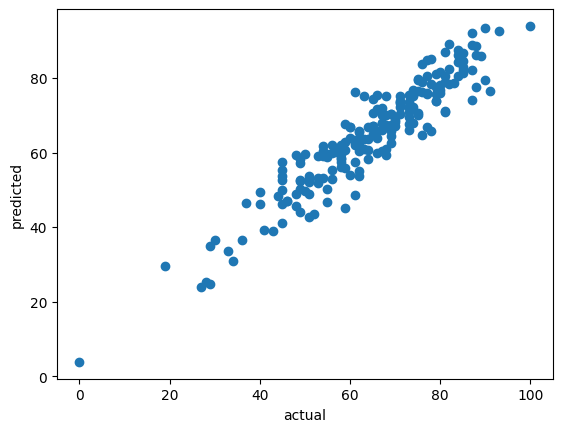

In [29]:
plt.scatter(y_test, y_pred);
plt.xlabel('actual');
plt.ylabel('predicted');

<Axes: xlabel='math_score'>

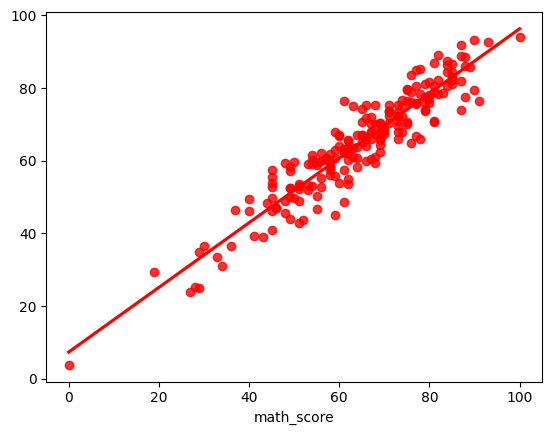

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='red')

#### Difference between Actual and Predicted values

In [31]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference': y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
